### Hough Transform

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: >, <matplotlib.image.AxesImage at 0x1769d8d3390>)

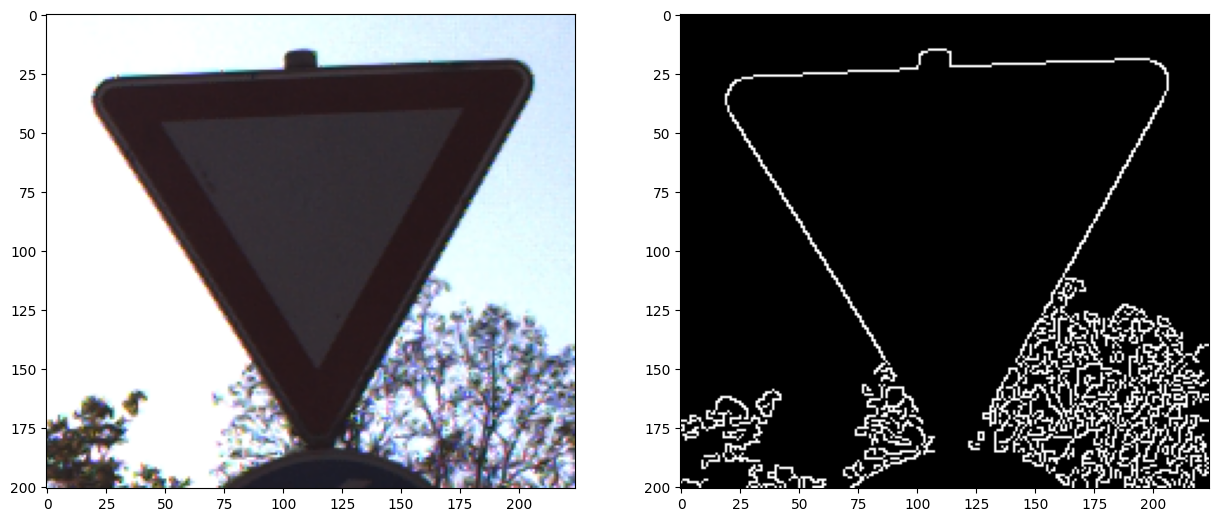

In [2]:
img = cv2.imread('data/yield.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=550)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(edges, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x1769db99f90>)

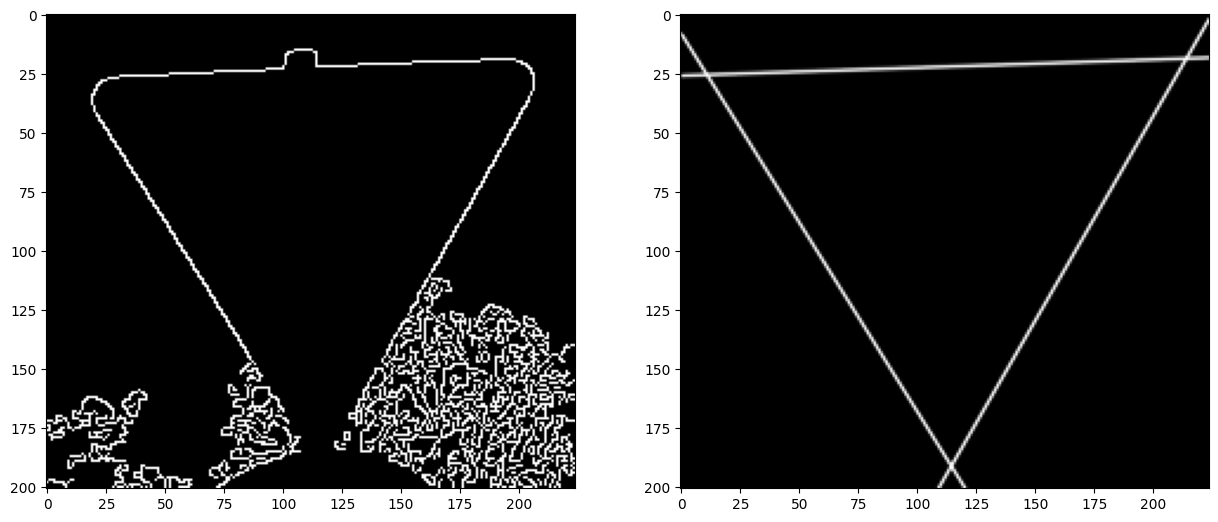

In [3]:
lines = cv2.HoughLines(edges, rho=1, theta=2*np.pi/180, threshold=50)
hough = np.zeros_like(edges)
    
for i in range(0, len(lines[0:3])):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(hough, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray')
plt.subplot(122), plt.imshow(hough, cmap='gray')